In [7]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import spearmanr
import itertools
import numpy as np

In [8]:
method_colors = {
    'velocyto': "#6587AB",
    'scvelo_dyn': "#76B7B2",
    'scvelo_stc': "#92CB8A",
    'veloae': "#F6A24F",
    'dynamo_m1': "#FF9DA7",
    'unitvelo_ind': "#9C755F",
    'unitvelo_uni': "#DC6F71",
    'velovae_std': "#C6A11B",
    'velovae_fullvb': "#4F5CD5",
    'deepvelo': "#B07AA1",
    'celldancer': "#2E91E5",
    'pyrovelocity_m1': "#1EB754",
    'pyrovelocity_m2': "#FFBE7A",
    'kvelo': "#A05195",
    'velovi': "#B5BD61",
    'cell2fate': "#AD2513",
    'sdevelo': "#1F3E80",
    'svelvetvae': "#F6D55C",
    'latentvelo_std': "#6ACCBC",
    'tivelo_std': "#694D34",
    'tivelo_simple': "#F39B7F",
    'sctour_mse': "#8A89A6",
    'sctour_nb': "#A7D9D3",
    'sctour_zinb': "#F97F05",
    'graphvelo_std': "#0AC7DC"
}

df_1 vs df_2: Spearman ρ = 0.146, p = 0.487


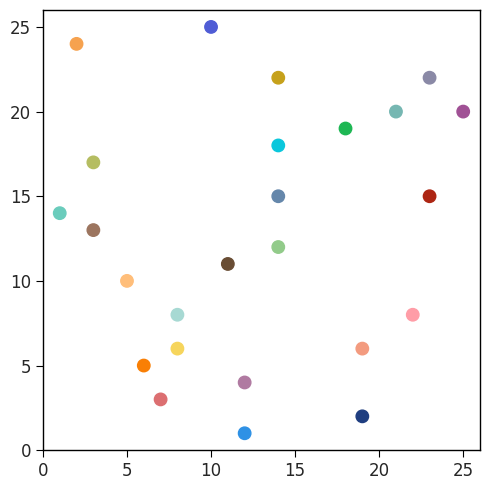

df_1 vs df_3: Spearman ρ = -0.483, p = 0.0144


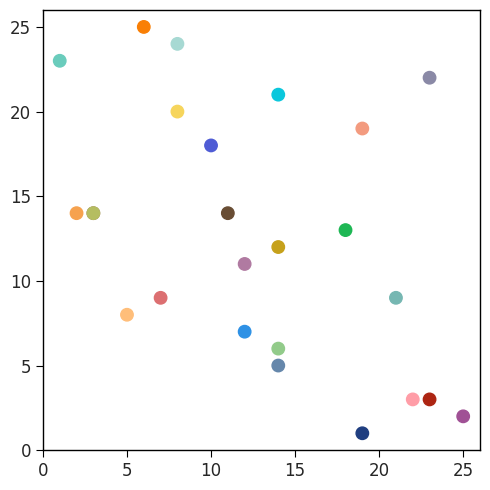

df_1 vs df_4: Spearman ρ = 0.342, p = 0.0938


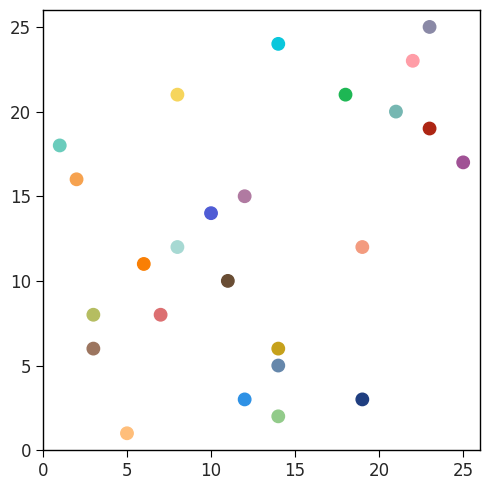

df_2 vs df_3: Spearman ρ = 0.122, p = 0.562


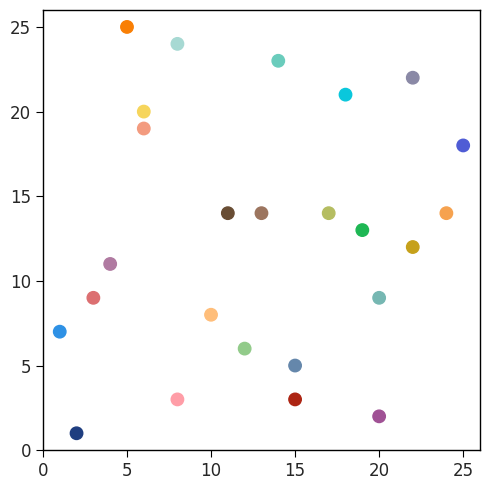

df_2 vs df_4: Spearman ρ = 0.376, p = 0.0642


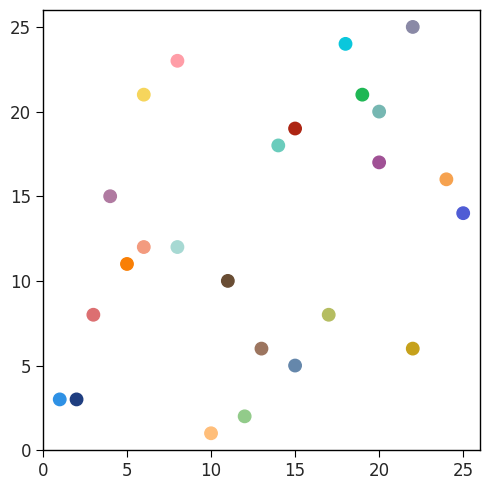

df_3 vs df_4: Spearman ρ = 0.324, p = 0.114


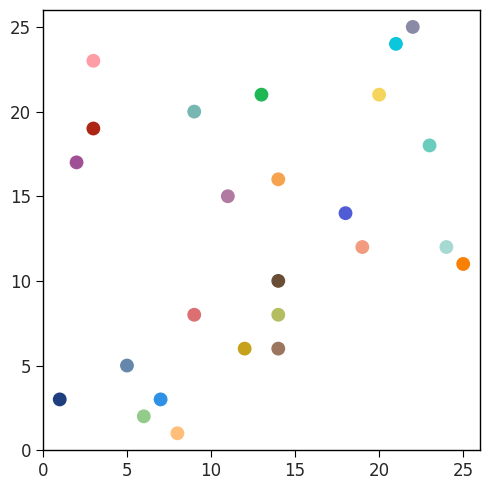

In [9]:
sns.set_style("white")

df_files = {
    "df_1": "df_1.csv",
    "df_2": "df_2.csv",
    "df_3": "df_3.csv",
    "df_4": "df_4.csv",
}

dfs = {}

for key, file in df_files.items():
    df = pd.read_csv(file)
    df = df.rename(columns={df.columns[0]: "Method", df.columns[-1]: key})
    dfs[key] = df[["Method", key]]

pairs = list(itertools.combinations(dfs.keys(), 2))

for A, B in pairs:
    dfA = dfs[A]
    dfB = dfs[B]

    df = pd.merge(dfA, dfB, on="Method", how="inner")

    rho, pval = spearmanr(df[A], df[B])
    print(f"{A} vs {B}: Spearman ρ = {rho:.3f}, p = {pval:.3g}")

    plt.figure(figsize=(5, 5))
    colors = df["Method"].map(method_colors)
    plt.scatter(df[A], df[B], s=80, color=colors)

    plt.xlabel(f"", fontsize=12)
    plt.ylabel(f"", fontsize=12)

    lims = [0, 26]
    plt.xlim(lims)
    plt.ylim(lims)

    x_ticks = np.arange(np.floor(lims[0]), np.ceil(lims[1]) + 1, 5)
    y_ticks = np.arange(np.floor(lims[0]), np.ceil(lims[1]) + 1, 5)
    plt.xticks(x_ticks, fontsize=12)
    plt.yticks(y_ticks, fontsize=12)

    ax = plt.gca()
    for spine in ax.spines.values():
        spine.set_visible(True)
        spine.set_color('black')
        spine.set_linewidth(1)

    plt.tick_params(
        axis='both',
        which='both',
        direction='out',
        length=5,
        color='black',
        top=False, right=False,
        bottom=True, left=True
    )

    plt.tight_layout()
    plt.savefig(f"{A}_{B}.svg", format="svg", bbox_inches="tight", dpi=300)
    plt.show()
